In [1]:
import numpy as np
import pandas as pd 
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import random
random.seed(108)
import datetime

In [2]:
os.getcwd()

'/kaggle/working'

In [3]:
df = pd.read_csv('../input/tabular-playground-series-aug-2022/train.csv',index_col='id')

In [4]:
df.head(5)

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [5]:
df.isna().sum()

product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [6]:
# Imputing Missing Values
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Columns of dtype object are imputed with the most frequent value in column. Columns of other types are imputed with mean of column."""
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in 
            X],index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
X = pd.DataFrame(df) 
df = DataFrameImputer().fit_transform(X)
df.isna().sum()

product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

Categorical Features vs. Target — Grouped Bar Chart

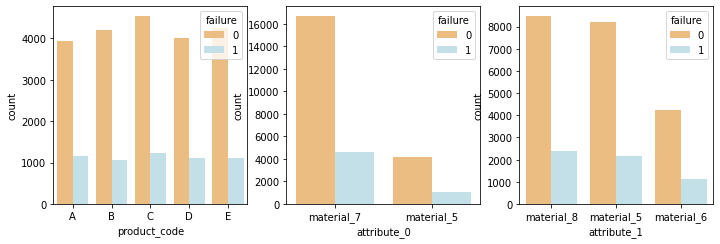

In [7]:
# bar plot 

cat_list = ['product_code', 'attribute_0', 'attribute_1']
fig = plt.figure(figsize = (16,8))

for i in range(len(cat_list)): 
    column = cat_list[i]
    sub = fig.add_subplot(2,4, i+1)
    chart = sns.countplot(data = df, x=column, hue='failure', palette='RdYlBu')

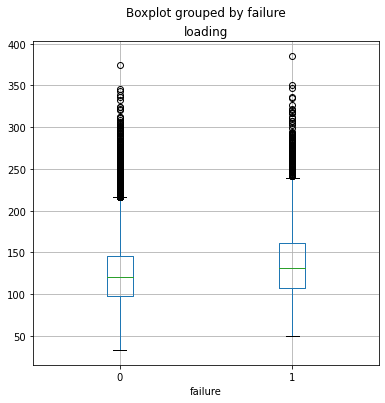

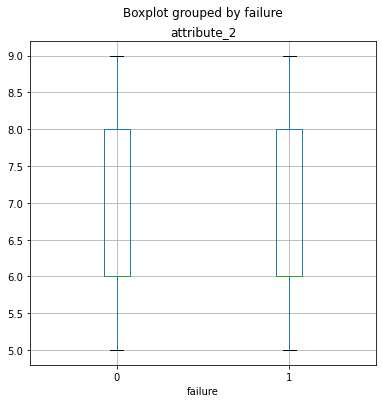

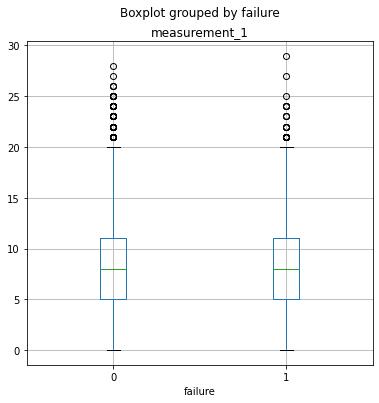

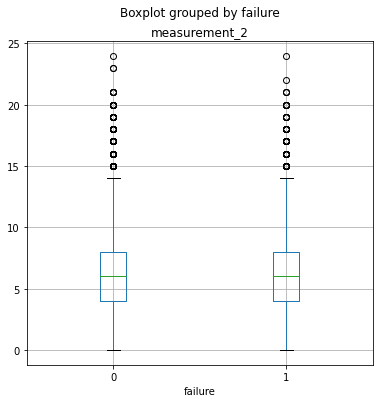

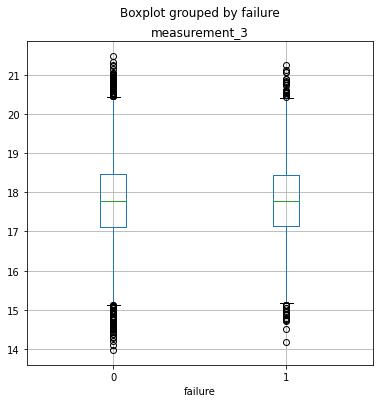

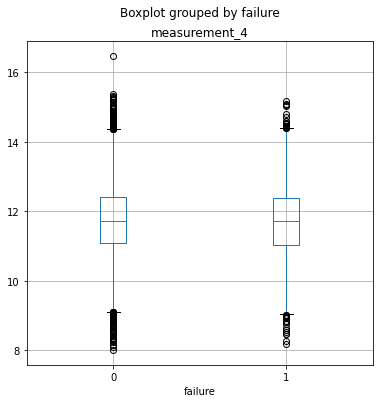

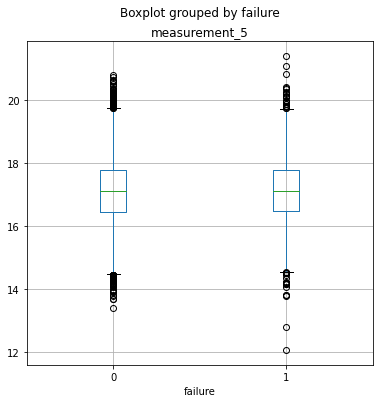

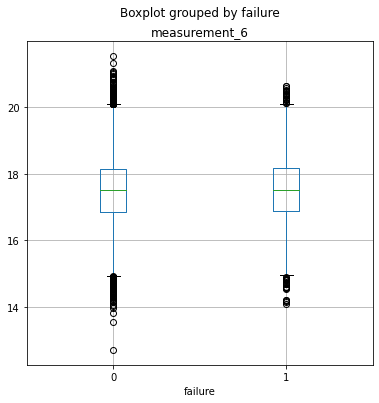

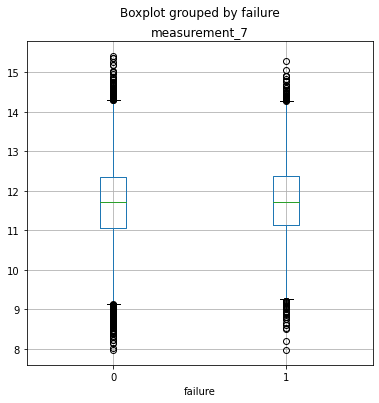

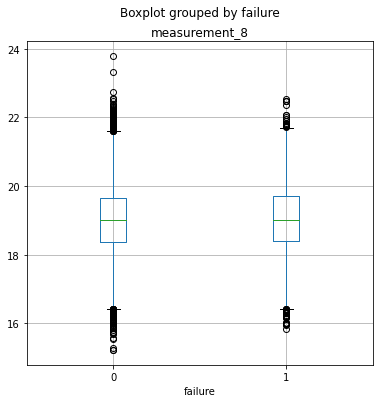

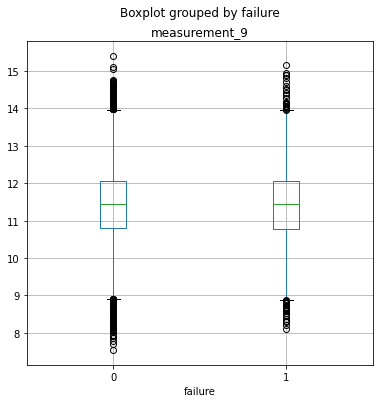

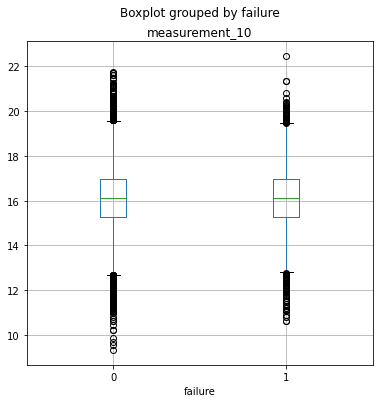

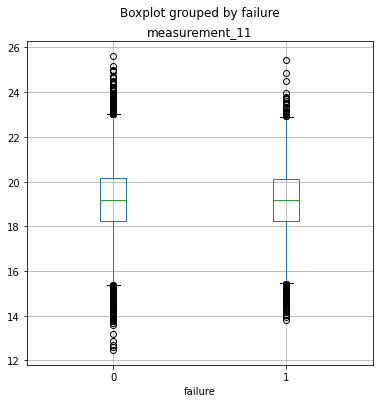

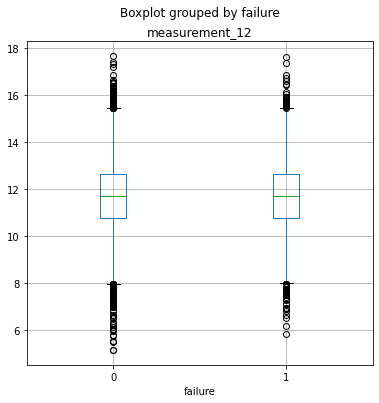

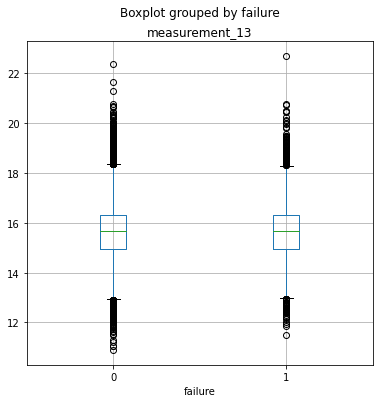

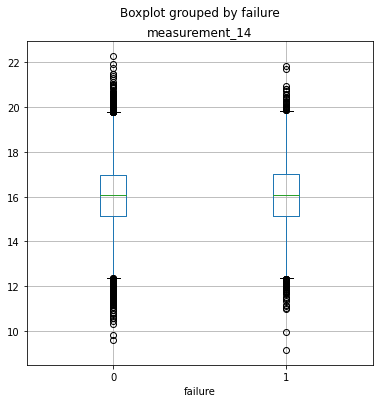

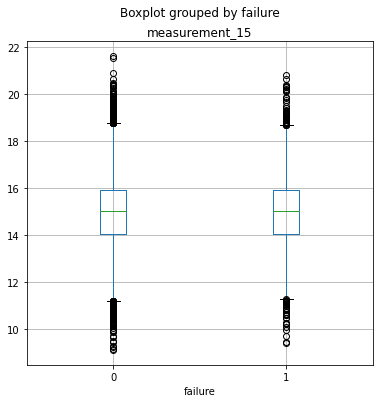

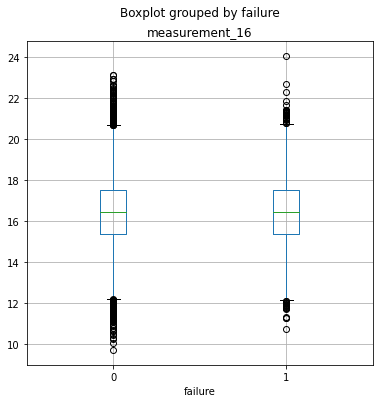

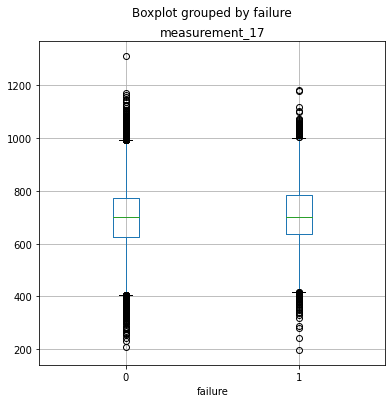

In [8]:
# box plot

from matplotlib import pyplot as plt
%matplotlib inline

num_list = ['loading', 'attribute_2', 'measurement_1','measurement_2', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17']
for col in num_list:
    df.boxplot(column=col, by='failure', figsize=(6,6))
    plt.title(col)
plt.show() 

In [9]:
#get all categorical columns
cat_columns = df.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [10]:
All = df.shape[0]
failed = df[df['failure'] == 1]
nonFailed = df[df['failure'] == 0]

x = len(failed)/All
y = len(nonFailed)/All

print('failed :',x*100,'%')
print('non Failed :',y*100,'%')

failed : 21.260820474219045 %
non Failed : 78.73917952578095 %


Text(0, 0.5, 'Frequency')

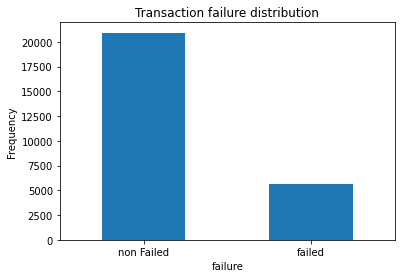

In [11]:

# Let's plot the Transaction class against the Frequency
labels = ['non Failed','failed']
classes = pd.value_counts(df['failure'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction failure distribution")
plt.xticks(range(2), labels)
plt.xlabel("failure")
plt.ylabel("Frequency")

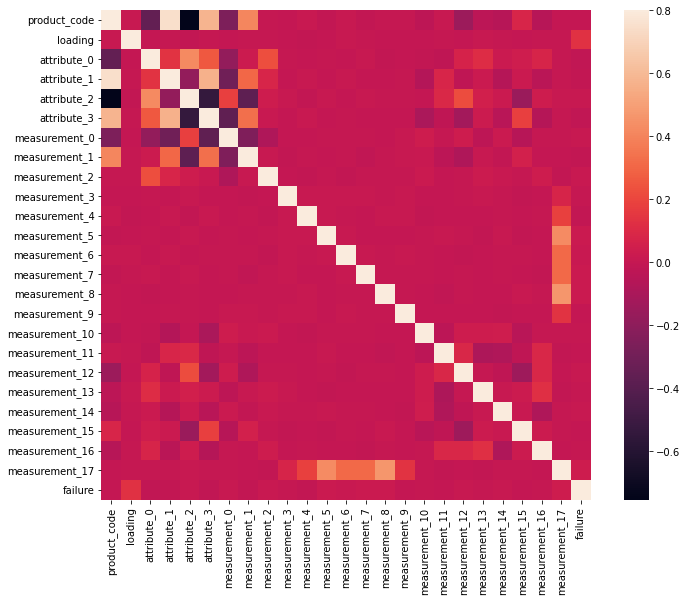

In [12]:
# heat map of correlation of features
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [13]:
# Separate features and labels
features = ['attribute_2', 'loading', 'measurement_0', 'measurement_1','measurement_2', 'measurement_3', 
            'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 
            'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 
            'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 
            'measurement_16', 'measurement_17']
label = 'failure'

X, y = df[features].values, df[label].values

In [14]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 18599
Test cases: 7971


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
num_list = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features
cat_list = [2]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_list),
        ('cat', categorical_transformer, cat_list)])


# Create preprocessing and training pipeline
reg = 0.01
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [2])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


Confusion Matrix:
 [[6290    8]
 [1668    5]] 

Accuracy: 0.7897377995232718
Overall Precision: 0.38461538461538464
Overall Recall: 0.002988643156007173

AUC: 0.5918959842088789


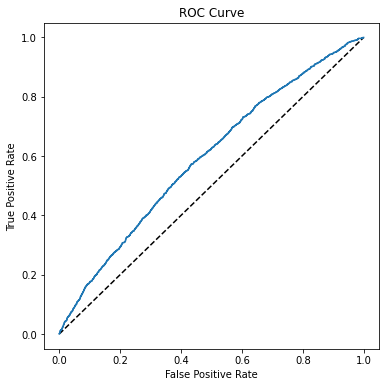

In [16]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [17]:
test = pd.read_csv('../input/tabular-playground-series-aug-2022/test.csv', index_col='id')
test.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
26570,F,119.57,material_5,material_6,6,4,6,9,6,19.305,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
26571,F,113.51,material_5,material_6,6,4,11,8,0,17.883,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
26572,F,112.16,material_5,material_6,6,4,8,12,4,18.475,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
26573,F,112.72,material_5,material_6,6,4,8,11,10,16.518,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
26574,F,208.00,material_5,material_6,6,4,14,16,8,17.808,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [18]:
test = test.drop(['product_code', 'attribute_0', 'attribute_1', 'attribute_3'], axis=1)
test.head()

,loading,attribute_2,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,
26570,119.57,6,6,9,6,19.305,10.178,17.534,18.168,11.598,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
26571,113.51,6,11,8,0,17.883,11.927,17.228,16.033,11.179,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
26572,112.16,6,8,12,4,18.475,10.481,16.619,18.189,12.126,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
26573,112.72,6,8,11,10,16.518,10.888,15.293,18.592,11.304,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
26574,208.00,6,14,16,8,17.808,12.693,17.678,15.814,13.431,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [19]:
# Imputing Missing Values
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Columns of dtype object are imputed with the most frequent value in column. Columns of other types are imputed with mean of column."""
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in 
            X],index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
X = pd.DataFrame(test) 
test = DataFrameImputer().fit_transform(X)
test.isna().sum()

loading           0
attribute_2       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

In [20]:
scale_test = StandardScaler() 
scale_test.fit(test)
test_features=scale_test.transform(test)

In [21]:
test_pred = model.predict(test_features)

In [22]:
test['failure'] = test_pred

In [23]:
submission = pd.DataFrame({'id':test.index, 'failure': test['failure']})
submission.to_csv('subKT1.csv', index=False)
submission

,id,failure
id,,
26570,26570,0
26571,26571,0
26572,26572,0
26573,26573,0
26574,26574,0
...,...,...
47340,47340,0
47341,47341,0
47342,47342,0


In [24]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6298
           1       0.38      0.00      0.01      1673

    accuracy                           0.79      7971
   macro avg       0.59      0.50      0.44      7971
weighted avg       0.71      0.79      0.70      7971



In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [26]:
from sklearn import metrics 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

model_list = ['LogisticRegression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

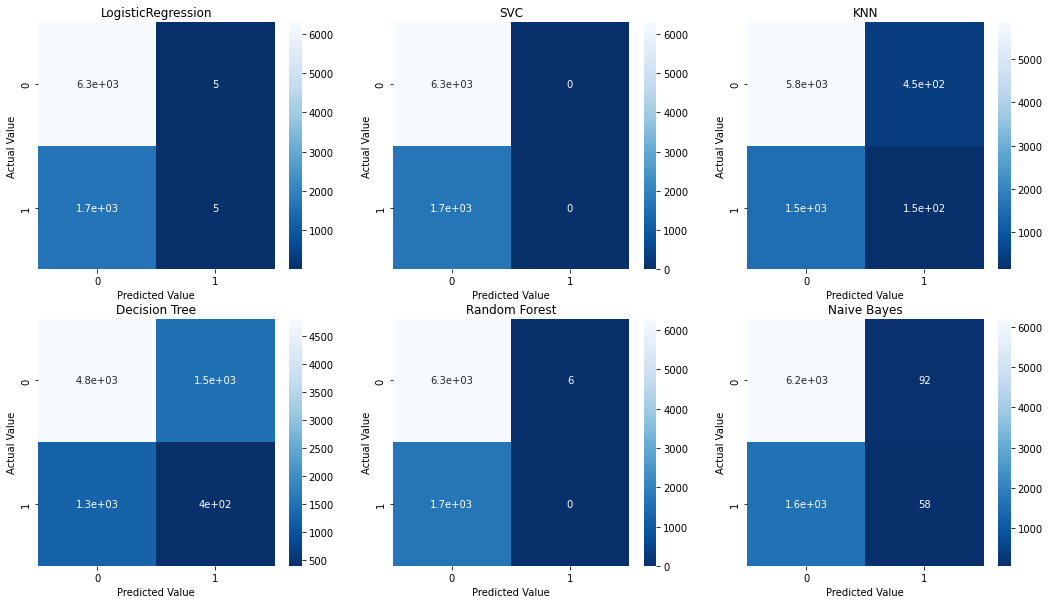

In [27]:
# plot confusion matrix 
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap="Blues_r")
    cm_plot.set_xlabel("Predicted Value")
    cm_plot.set_ylabel("Actual Value")

In [28]:
result_df = pd.DataFrame({"Model":model_list, "Accuracy":acc_list, "AUC":auc_list})
result_df

,Model,Accuracy,AUC
0,LogisticRegression,0.790114,0.50
1,SVC,0.790114,0.50
2,KNN,0.752603,0.51
3,Decision Tree,0.653745,0.50
4,Random Forest,0.789361,0.50
5,Naive Bayes,0.785849,0.51
